In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("data/gold.csv")
pd.set_option('display.max_columns', None)  

In [48]:
import pandas as pd

# Filtrer les lignes avec "Montant" supérieur à 5 millions
df_filtered = df[df['Montant'] > 5000000]

# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df_filtered.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df_filtered[~mask]

# Afficher le dataframe filtré
df_filtered


,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,Continent,niveau_achat,Recency,Frequency,Frequency_reel,Montant
54,489438,21329,28,2009-12-01,2009,12,0.98,18102.0,United Kingdom,27.44,2286.24,9.0,86.0,58.0,0.0,6.0,2.0,United Kingdom,4.0,0,153.0,145.0,6778621.37
437,489520,35751C,12,2009-12-01,2009,12,0.75,14911.0,EIRE,9.00,733.63,16.0,262.0,232.0,7.0,61.0,44.0,Europe,4.0,1,510.0,398.0,11931038.60
994,489546,84050,6,2009-12-01,2009,12,1.65,14156.0,EIRE,9.90,584.50,10.0,128.0,64.0,3.0,33.0,10.0,Europe,4.0,9,202.0,156.0,13873499.47
2595,489702,22086,280,2009-12-02,2009,12,2.55,17511.0,United Kingdom,714.00,3108.64,2.0,41.0,42.0,0.0,11.0,14.0,United Kingdom,4.0,2,85.0,60.0,7427754.43
4272,489875,79160,11,2009-12-02,2009,12,2.10,17841.0,United Kingdom,23.10,530.76,9.0,119.0,161.0,1.0,34.0,43.0,United Kingdom,4.0,1,289.0,211.0,5681697.88
4547,489889,22271,96,2009-12-02,2009,12,2.55,14646.0,Netherlands,244.80,4734.24,5.0,84.0,75.0,0.0,9.0,3.0,Europe,4.0,1,164.0,152.0,29957131.19
14032,490937,22273,24,2009-12-08,2009,12,2.95,13081.0,United Kingdom,70.80,2285.58,1.0,24.0,19.0,0.0,6.0,10.0,United Kingdom,4.0,1,44.0,28.0,7890866.30
19356,491612,16168S,216,2009-12-11,2009,12,0.09,14298.0,United Kingdom,19.44,849.94,2.0,42.0,40.0,0.0,1.0,1.0,United Kingdom,4.0,3,84.0,82.0,7788613.81
199041,513987,21917,24,2010-06-30,2010,6,0.42,12415.0,Australia,10.08,2326.74,0.0,7.0,26.0,0.0,0.0,5.0,Oceania,4.0,24,33.0,28.0,12129731.00
313931,527124,72807A,66,2010-10-14,2010,10,3.81,14088.0,United Kingdom,251.46,12695.14,0.0,6.0,14.0,0.0,3.0,1.0,United Kingdom,4.0,10,20.0,16.0,5409712.00


In [49]:
df = df[df['Montant'] <= 5000000]


In [50]:
df = df.drop('niveau_achat', axis=1)


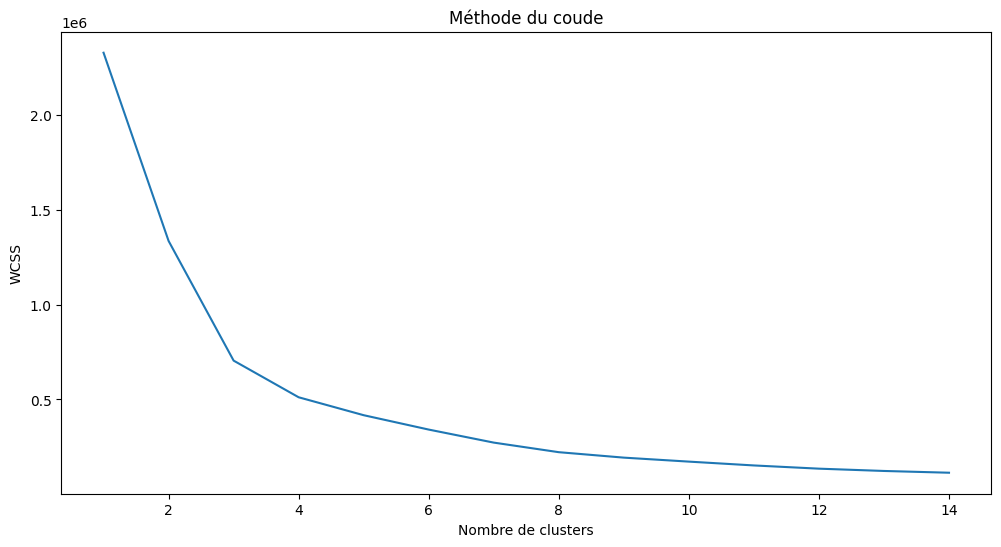

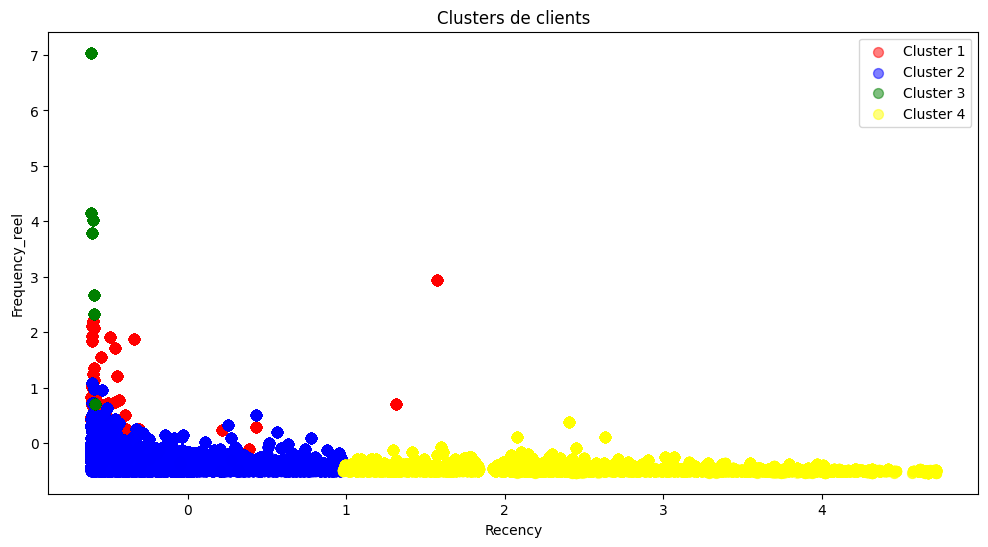

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalisation des données
scaler = StandardScaler()
data = scaler.fit_transform(df[['Recency', 'Frequency_reel', 'Montant']])

# Détermination du nombre optimal de clusters en utilisant la méthode du coude
wcss = []
for i in range(1, 15):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(data)
 wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 15), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

# Entraînement du modèle KMeans avec le nombre optimal de clusters
n_clusters = 4 # Remplacez cette valeur par le nombre optimal de clusters déterminé à l'aide de la méthode du coude
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)

# Visualisation des clusters
plt.figure(figsize=(12,6))
plt.scatter(data[pred_y == 0, 0], data[pred_y == 0, 1], s=50, c='red', label='Cluster 1', alpha=0.5)
plt.scatter(data[pred_y == 1, 0], data[pred_y == 1, 1], s=50, c='blue', label='Cluster 2', alpha=0.5)
plt.scatter(data[pred_y == 2, 0], data[pred_y == 2, 1], s=50, c='green', label='Cluster 3', alpha=0.5)
plt.scatter(data[pred_y == 3, 0], data[pred_y == 3, 1], s=50, c='yellow', label='Cluster 4', alpha=0.5)

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de clients')
plt.xlabel('Recency')
plt.ylabel('Frequency_reel')
plt.legend()
plt.show()


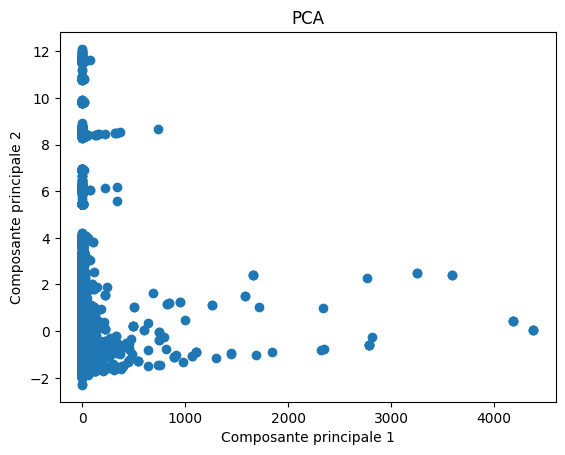

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalisation des données
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

data_std = std_scaler.fit_transform(df[['Quantity','Recency', 'Frequency_reel']])
data_robust = robust_scaler.fit_transform(df[['Montant', 'Price']])

data = np.hstack((data_std, data_robust))

# Entraînement du modèle PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# Visualisation des résultats de la PCA
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.title('PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


In [53]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011', 'Continent', 'Recency',
       'Frequency', 'Frequency_reel', 'Montant'],
      dtype='object')
